In [ ]:
import numpy as np

A,B=np.array([1,2,3]),np.array([4,5,6])
A+B # 두 벡터의 덧셈

array([5, 7, 9])

In [ ]:
A-B # 두 벡터의 뺄셈

array([-3, -3, -3])

# Gram-Schmidt orthogonalization process

### 두 벡터 u_1=(1,1)과 u_2=(1,0)은 서로 독립이지만 직교하지는 않는다. u_1 방향의 단위 벡터를 v_1,  v_1에 수직인 단위 벡터를 만들어 v_2라고 하자. 그리고, u_1,u_2를 v_1,v_2의 선형결합으로 표현하여 보아라.

In [ ]:
import sympy as sp
u1,u2=sp.Matrix([1,1]),sp.Matrix([1,0])
# 벡터를 벡터의 크기로 나눔
v1=u1/u1.norm()
v1.norm() # 단위벡터 확인

1

In [ ]:
v1

Matrix([
[sqrt(2)/2],
[sqrt(2)/2]])

In [ ]:
v2=u2-((u2.dot(v1))/(v1.norm()))*v1
v2

Matrix([
[ 1/2],
[-1/2]])

In [ ]:
# 단위벡터로 변환
v2=v2/v2.norm()
v2

Matrix([
[ sqrt(2)/2],
[-sqrt(2)/2]])

In [ ]:
# 직교함을 증명
v1.dot(v2)

0

### 3차원 벡터 u_1=(1,1,1),u_2=(1,0,1),u_3=(-1,1,0) 은 서로 독립이지만 직교하지는 않는다. u_1 방향의 단위 벡터를 v_1,  v_1에 수직인 단위 벡터를 만들어 v_2, v_1,v_2에 수직인 단위 벡터를 만들어 v_3라고 하고, u_1,u_2,u_3를 v_1,v_2,v_3의 선형결합으로 표현하여 보아라

In [ ]:
u1,u2,u3=sp.Matrix([1,1,1]),sp.Matrix([1,0,1]),sp.Matrix([-1,1,0])
# 벡터를 벡터의 크기로 나눔
v1=u1/u1.norm()
v1.norm() # 단위벡터 확인

1

In [ ]:
v1

Matrix([
[sqrt(3)/3],
[sqrt(3)/3],
[sqrt(3)/3]])

In [ ]:
v2=u2-((u2.dot(v1))/(v1.norm()))*v1
# 단위벡터로 변환
v2=v2/v2.norm()
v2

Matrix([
[ sqrt(6)/6],
[-sqrt(6)/3],
[ sqrt(6)/6]])

In [ ]:
# 직교함을 증명
v1.dot(v2)

0

In [ ]:
v3=u3-((u3.dot(v1))/(v1.norm()))*v1-((u3.dot(v2))/(v2.norm()))*v2
v3

Matrix([
[-1/2],
[   0],
[ 1/2]])

In [ ]:
# 단위벡터로 변환
v3=v3/v3.norm()
v3

Matrix([
[-sqrt(2)/2],
[         0],
[ sqrt(2)/2]])

In [ ]:
# 직교함을 증명
v1.dot(v3),v2.dot(v3)

(0, 0)

# QR Decomposition

In [ ]:
# QR 분해 예제
import sympy as sp
u1,u2=sp.Matrix([3,4]),sp.Matrix([1,1])
A=sp.Matrix([u1.T,u2.T])
A=A.T
Q,R=A.QRdecomposition()
Q

Matrix([
[3/5,  4/5],
[4/5, -3/5]])

In [ ]:
R

Matrix([
[5, 7/5],
[0, 1/5]])

In [ ]:
import numpy as np
v2=np.array([4/25,-3/25])
v2=sp.Matrix(v2)
v2.norm()
v2=v2/v2.norm()
v2

Matrix([
[ 0.8],
[-0.6]])

In [ ]:
# QR 분해 예제
u1,u2,u3=sp.Matrix([1,1,1]),sp.Matrix([1,0,1]),sp.Matrix([-1,1,0])
A=sp.Matrix([u1.T,u2.T,u3.T])
A=A.T
A

Matrix([
[1, 1, -1],
[1, 0,  1],
[1, 1,  0]])

In [ ]:
# QR 분해
Q,R=A.QRdecomposition()
Q

Matrix([
[sqrt(3)/3,  sqrt(6)/6, -sqrt(2)/2],
[sqrt(3)/3, -sqrt(6)/3,          0],
[sqrt(3)/3,  sqrt(6)/6,  sqrt(2)/2]])

In [ ]:
R

Matrix([
[sqrt(3), 2*sqrt(3)/3,          0],
[      0,   sqrt(6)/3, -sqrt(6)/2],
[      0,           0,  sqrt(2)/2]])

In [ ]:
# Q의 열들이 서로 직각인지 확인
import numpy as np

for i in range(A.cols):
    for j in range(i):
        if i != j:
            out=Q[:,j].transpose() @ Q[:,i]
            out=np.array(out)
            print(f'{j+1}열과 {i+1}열의 내적: {out[0][0]}')

1열과 2열의 내적: 0
1열과 3열의 내적: 0
2열과 3열의 내적: 0


In [ ]:
A-Q@R

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [ ]:
det(A)

-1

In [ ]:
from sympy import det
det(Q)

-1

In [ ]:
det(R)

1

In [ ]:
# QR 분해 예제 2
u1,u2,u3=sp.Matrix([2,-1,1]),sp.Matrix([1,-3,1]),sp.Matrix([-1,4,0])
A=sp.Matrix([u1.T,u2.T,u3.T])
A=A.T
A

Matrix([
[ 2,  1, -1],
[-1, -3,  4],
[ 1,  1,  0]])

In [ ]:
det(A)

-6

In [ ]:
Q,R=A.QRdecomposition()
Q

Matrix([
[ sqrt(6)/3,   -sqrt(5)/5, -sqrt(30)/15],
[-sqrt(6)/6, -2*sqrt(5)/5,  sqrt(30)/30],
[ sqrt(6)/6,            0,   sqrt(30)/6]])

In [ ]:
R

Matrix([
[sqrt(6), sqrt(6),     -sqrt(6)],
[      0, sqrt(5), -7*sqrt(5)/5],
[      0,       0,   sqrt(30)/5]])

In [ ]:
det(Q)

-1

In [ ]:
det(R)

6

# Eigenvalue Decomposition

In [ ]:
import sympy as smp
import numpy as np

A=smp.Matrix(3,3,[2,0,-1,0,4,0,-1,0,1])
A

Matrix([
[ 2, 0, -1],
[ 0, 4,  0],
[-1, 0,  1]])

In [ ]:
x1,x2,x3=smp.symbols('x1 x2 x3') # 기호 정의
e=smp.symbols('e',nonzero=True) # 기호 정의
x=smp.Matrix(3,1,[x1,x2,x3])
# 행렬에서의 곱은 '@'을 쓰는게 좋다.
smp.solve(A@x-e*x,[x1,x2,x3,e])

[(0, x2, 0, 4),
 (x3*(-1/2 + sqrt(5)/2), 0, x3, 3/2 - sqrt(5)/2),
 (x3*(-sqrt(5)/2 - 1/2), 0, x3, sqrt(5)/2 + 3/2),
 (0, 0, 0, e)]

In [ ]:
x=smp.Matrix(3,1,[0,1,0])
A@x-4*x

Matrix([
[0],
[0],
[0]])

In [ ]:
P,D=A.diagonalize()
D

Matrix([
[4,               0,               0],
[0, 3/2 - sqrt(5)/2,               0],
[0,               0, sqrt(5)/2 + 3/2]])

In [ ]:
P

Matrix([
[0, -1/2 + sqrt(5)/2, -sqrt(5)/2 - 1/2],
[1,                0,                0],
[0,                1,                1]])

In [ ]:
# 고유벡터인지 검증
for i in range(3):
    out=A@P[:,i]-D[i,i]*P[:,i]
    #pprint()를 사용하면 행렬 모양으로 출력된다.
    smp.pprint(out.evalf())

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
⎡-0.e-124⎤
⎢        ⎥
⎢   0    ⎥
⎢        ⎥
⎣   0    ⎦
⎡0.e-123⎤
⎢       ⎥
⎢   0   ⎥
⎢       ⎥
⎣   0   ⎦


In [ ]:
# 고유벡터의 크기 출력
for i in range(3):
    out=P[:,i].T@P[:,i]
    smp.pprint(out.evalf())

[1.0]
[1.38196601125011]
[3.61803398874989]


In [ ]:
O=P.T@P
O.evalf()

Matrix([
[1.0,                0,                0],
[  0, 1.38196601125011,          0.e-125],
[  0,          0.e-125, 3.61803398874989]])

In [ ]:
A-P@D@P.inv() # P.inv()는 P의 역함수

Matrix([
[sqrt(5)*(-sqrt(5)/2 - 1/2)*(sqrt(5)/2 + 3/2)/5 - (-1/2 + sqrt(5)/2)*(1 - sqrt(5))*(3/2 - sqrt(5)/2)/(-5 + sqrt(5)) + 2, 0, -1 - (-1/2 + sqrt(5)/2)*(3/2 - sqrt(5)/2)/(5/2 - sqrt(5)/2) - (1/2 - sqrt(5)/10)*(-sqrt(5)/2 - 1/2)*(sqrt(5)/2 + 3/2)],
[                                                                                                                     0, 0,                                                                                                                     0],
[                                     -1 - (1 - sqrt(5))*(3/2 - sqrt(5)/2)/(-5 + sqrt(5)) + sqrt(5)*(sqrt(5)/2 + 3/2)/5, 0,                                       -(1/2 - sqrt(5)/10)*(sqrt(5)/2 + 3/2) - (3/2 - sqrt(5)/2)/(5/2 - sqrt(5)/2) + 1]])

In [ ]:
_.evalf() # 도는 값들을 숫자로 계산

Matrix([
[-0.e-127, 0, 0.e-126],
[       0, 0,       0],
[ 0.e-126, 0, 0.e-125]])

In [ ]:
sol=smp.solve(A@x-e*x,[x1,x2,x3,e])
sol

{e: 4}

In [ ]:
A@P-P@D

array([[-0.20081142, -3.79918858,  1.05146222],
       [-2.42784414, -4.        ,  5.05146222],
       [-3.80422607, -3.6750803 ,  1.05146222]])

## numpy를 이용한 고유값 분해

In [ ]:
A=smp.Matrix(3,3,[2,0,-1,0,4,0,-1,0,1])
A=np.array(A).astype(int) # 심파이형태를 넘파이로 변환
D,P=np.linalg.eig(A) # eig()함수를 이용해 고유값과 고유벡터 계산
D

array([2.61803399, 0.38196601, 4.        ])

In [ ]:
P

array([[ 0.85065081,  0.52573111,  0.        ],
       [ 0.        ,  0.        ,  1.        ],
       [-0.52573111,  0.85065081,  0.        ]])

In [ ]:
# np.allclose(A,0) A가 거의 0이면 True 리턴
for i in range(3): #
    print(np.allclose(A@P.T[i]-D[i]*P.T[i],0))

True
True
True


In [ ]:
D=np.diag(D) #대각행렬로 변환
D

array([[2.61803399, 0.        , 0.        ],
       [0.        , 0.38196601, 0.        ],
       [0.        , 0.        , 4.        ]])

In [ ]:
# AP-PD의 거의 모든 원소가 0에 가까운지 검증
np.allclose(A@P-P@D,0)

True

In [ ]:
smp.Matrix(P)

Matrix([
[  0.85065080835204, 0.525731112119133, 0.0],
[               0.0,               0.0, 1.0],
[-0.525731112119133,  0.85065080835204, 0.0]])

In [ ]:
smp.Matrix(A@P)

Matrix([
[ 2.22703272882321, 0.200811415886227, 0.0],
[              0.0,               0.0, 4.0],
[-1.37638192047117, 0.324919696232906, 0.0]])

In [ ]:
smp.Matrix(P@D)

Matrix([
[ 2.22703272882321, 0.200811415886227, 0.0],
[              0.0,               0.0, 4.0],
[-1.37638192047117, 0.324919696232906, 0.0]])

In [ ]:
smp.Matrix(A@P.T[0])

Matrix([
[ 2.22703272882321],
[              0.0],
[-1.37638192047117]])

In [ ]:
smp.Matrix(D[0]*P.T[0])

Matrix([
[2.22703272882321],
[             0.0],
[             0.0]])

In [ ]:
# np.allclose(A,0) A가 거의 0이면 True 리턴
for i in range(3): # i는 0부터 2까지, 각 칼럼을 선택함
    print(np.allclose(A@P.T[i]-D[i][i]*P.T[i],0))

True
True
True


In [ ]:
# 각 고유벡터의 크기 계산
smp.Matrix(P@P.T)

Matrix([
[1.0, 0.0, 0.0],
[0.0, 1.0, 0.0],
[0.0, 0.0, 1.0]])

In [ ]:
smp.Matrix(P.T@P)

Matrix([
[1.0, 0.0, 0.0],
[0.0, 1.0, 0.0],
[0.0, 0.0, 1.0]])

# 블록행렬의 곱셈

In [ ]:
from sympy import Matrix, BlockMatrix, symbols

# 심볼 정의
a, b, c, d, e, f, g, h = symbols('a b c d e f g h')

# Block matrix A 정의
A1 = Matrix([[a, b], [c, d]])
A2 = Matrix([[e, f], [g, h]])
A = BlockMatrix([[A1,A2]])

# Block matrix B 정의
B1 = Matrix([[a, b], [c, d]])
B2 = Matrix([[e, f], [g, h]])
B = BlockMatrix([[B1],[B2]])

# Block matrix 곱셈
A * B

Matrix([[Matrix([
[a, b],
[c, d]]), Matrix([
[e, f],
[g, h]])]])*Matrix([
[Matrix([
[a, b],
[c, d]])],
[Matrix([
[e, f],
[g, h]])]])

In [ ]:
from sympy import MatrixSymbol,symbols, BlockMatrix, Matrix
p,q,r,s=symbols('p q r s',integer=True, positive=True)
A1=MatrixSymbol('A1',p,q)
A2=MatrixSymbol('A2',r,q)
B1=MatrixSymbol('B1',q,r)
B2=MatrixSymbol('B2',q,s)
A=Matrix([[A1],[A2]])
A

Matrix([
[A1],
[A2]])

In [ ]:
B=Matrix([[B1,B2]])
B

Matrix([[B1, B2]])

In [ ]:
A@B

Matrix([
[A1*B1, A1*B2],
[A2*B1, A2*B2]])

In [ ]:
B@A

Matrix([[B1*A1 + B2*A2]])

In [ ]:
from sympy import Matrix, BlockMatrix
# Block matrix A 정의
A1 = Matrix([[1, 2], [3, 4]])
A2 = Matrix([[5, 6], [7, 8]])
A = Matrix.vstack(A1,A2)

# Block matrix B 정의
B1 = Matrix([[1, 2], [3, 4]])
B2 = Matrix([[5, 6], [7, 8]])
B = Matrix.hstack(B1,B2)

A*B

Matrix([
[ 7, 10, 19,  22],
[15, 22, 43,  50],
[23, 34, 67,  78],
[31, 46, 91, 106]])

In [ ]:
# numpy를 이용해서 검증
A1=np.array(A1).astype(int)
A2=np.array(A2).astype(int)
A=np.vstack((A1,A2))
B1=np.array(B1).astype(int)
B2=np.array(B2).astype(int)
B=np.hstack((B1,B2))
Matrix(A@B)

Matrix([
[ 7, 10, 19,  22],
[15, 22, 43,  50],
[23, 34, 67,  78],
[31, 46, 91, 106]])

In [ ]:
A1*B1

Matrix([
[ 7, 10],
[15, 22]])

In [ ]:
A1*B2

Matrix([
[19, 22],
[43, 50]])

In [ ]:
A2*B1

Matrix([
[23, 34],
[31, 46]])

In [ ]:
A2*B2

Matrix([
[67,  78],
[91, 106]])

# 대칭행렬의 고유벡터 직교성 알아보기

In [ ]:
import sympy as smp

n=smp.symbols('n') # 문자 기호 정의
A=smp.MatrixSymbol('A',n,n) # 행렬 정의
B=smp.MatrixSymbol('B',n,n) # 행렬 정의
(A@B).T # 곱 행렬의 전치행렬

B.T*A.T

In [ ]:
(A@B).inv() # 곱 행렬의 역행렬

B**(-1)*A**(-1)

In [ ]:
import sympy as smp
import numpy as np

A=smp.Matrix(3,3,[2,0,-1,0,4,0,-1,0,1])
A

Matrix([
[ 2, 0, -1],
[ 0, 4,  0],
[-1, 0,  1]])

In [ ]:
A-A.T #대칭행렬 검증

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [ ]:
A=np.array(A).astype(int)
D,P=np.linalg.eig(A)
D=np.diag(D)
smp.Matrix(D)

Matrix([
[2.61803398874989,               0.0, 0.0],
[             0.0, 0.381966011250105, 0.0],
[             0.0,               0.0, 4.0]])

In [ ]:
# 서로 같은 고유벡터의 내적값 확인
for i in range(3):
     print(P.T[i]@P.T[i])# 내적의 값구하기

0.9999999999999998
0.9999999999999998
1.0


In [ ]:
# 서로 다른 고유벡터의 내적값 확인
for i in range(3): # i=0,1,2
    for j in range(i): #j=0,..,i-1
        print(P.T[j]@P.T[i])# 내적의 값구하기

1.212722197559916e-17
0.0
0.0


In [ ]:
P@P.T

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
np.allclose(np.linalg.inv(P)-P.T,0)

True

# Singular Value Decompostion

In [2]:
from sympy import Matrix
import numpy as np
A=np.array([[-1,2,0,1],[1,0,-1,-1]])
Matrix(A)

Matrix([
[-1, 2,  0,  1],
[ 1, 0, -1, -1]])

In [3]:
A @ A.T

array([[ 6, -2],
       [-2,  3]])

In [4]:
D,U=np.linalg.eig(A@A.T)
D=np.diag(D)
Matrix(D)

Matrix([
[7.0, 0.0],
[0.0, 2.0]])

In [5]:
Matrix(U)

Matrix([
[ 0.894427190999916, 0.447213595499958],
[-0.447213595499958, 0.894427190999916]])

In [6]:
U.T @ U

array([[1., 0.],
       [0., 1.]])

In [7]:
A.T @ A

array([[ 2, -2, -1, -2],
       [-2,  4,  0,  2],
       [-1,  0,  1,  1],
       [-2,  2,  1,  2]])

In [8]:
D,V=np.linalg.eig(A.T@A)
Matrix(D)

Matrix([
[                 7.0],
[                 2.0],
[3.96476555751099e-16],
[  4.040775743349e-17]])

In [9]:
Matrix(V)

Matrix([
[-0.50709255283711, -0.316227766016838,   -0.66479369047041, 0.0135128095234083],
[0.676123403782813, -0.632455532033676,  -0.334077252752424, -0.330283143701322],
[0.169030850945703,  0.632455532033675,  -0.668154505504849, -0.660566287402644],
[ 0.50709255283711,  0.316227766016838, 0.00336081503443882,  0.674079096926053]])

In [10]:
Matrix(V@V.T)

Matrix([
[ 0.799276104053341,  0.0747722536927292,  0.149544507385458,  -0.350268403332117],
[0.0747722536927292,    1.07783742296269,  0.155674845925386, -0.0809025922326565],
[ 0.149544507385458,   0.155674845925386,   1.31134969185077,  -0.161805184465313],
[-0.350268403332117, -0.0809025922326565, -0.161805184465313,   0.811536781133195]])

In [11]:
# eigh()는 대칭행렬의 고유값 분해
# 직교행렬을 항상 만들어줌
Dv, V = np.linalg.eigh(A.T @ A)
Dv

array([1.95283866e-16, 4.70849949e-16, 2.00000000e+00, 7.00000000e+00])

In [12]:
# 고유값, 고유벡터 내림차순 정렬
idx = np.argsort(Dv)[::-1]  # 큰 것부터
Dv = Dv[idx]
V = V[:, idx]

In [13]:
# 소수이하 11자리에서 반올림
Matrix(np.round(V@V.T,10))

Matrix([
[1.0, 0.0, 0.0, 0.0],
[0.0, 1.0, 0.0, 0.0],
[0.0, 0.0, 1.0, 0.0],
[0.0, 0.0, 0.0, 1.0]])

In [14]:
Sd=np.zeros_like(A,dtype=float)
np.fill_diagonal(Sd,np.sqrt(Dv))
Matrix(Sd)

Matrix([
[2.64575131106459,             0.0, 0.0, 0.0],
[             0.0, 1.4142135623731, 0.0, 0.0]])

In [15]:
Dv, V = np.linalg.eigh(A.T @ A)
# 고유값, 고유벡터 내림차순 정렬
idx = np.argsort(Dv)[::-1]  # 큰 것부터
Dv = Dv[idx]
V = V[:, idx]
# 특이값행렬 재구성
Sd=np.zeros_like(A,dtype=float)
np.fill_diagonal(Sd,np.sqrt(Dv))
Matrix(Sd)

Matrix([
[2.64575131106459,             0.0, 0.0, 0.0],
[             0.0, 1.4142135623731, 0.0, 0.0]])

In [16]:
# SVD 분해 검증
Matrix(np.round(A-U@Sd@V.T,10))

Matrix([
[0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0]])

In [17]:
u,S,vt=np.linalg.svd(A)
Matrix(S)

Matrix([
[2.64575131106459],
[1.41421356237309]])

In [18]:
S**2

array([7., 2.])

In [19]:
Matrix(u)

Matrix([
[-0.894427190999916, 0.447213595499958],
[ 0.447213595499958, 0.894427190999916]])

In [20]:
Matrix(vt.T)

Matrix([
[  0.50709255283711,  0.316227766016838,  0.485496740990304,   0.638083111628052],
[-0.676123403782813,  0.632455532033676,  0.373164652219934, -0.0600440271027716],
[-0.169030850945703, -0.632455532033676,  0.746329304439869,  -0.120088054205543],
[ -0.50709255283711, -0.316227766016838, -0.260832563449564,   0.758171165833594]])

In [21]:
from sympy import Matrix
import numpy as np
A=np.array([[-1,1,0],[0,-1,1]])
Matrix(A)

Matrix([
[-1,  1, 0],
[ 0, -1, 1]])

In [22]:
A @ A.T

array([[ 2, -1],
       [-1,  2]])

In [23]:
D,P=np.linalg.eig(A@A.T)
D=np.diag(D)
Matrix(D)

Matrix([
[3.0, 0.0],
[0.0, 1.0]])

In [24]:
Matrix(P)

Matrix([
[ 0.707106781186547, 0.707106781186547],
[-0.707106781186547, 0.707106781186547]])

In [25]:
U,S,Vt=np.linalg.svd(A)

In [26]:
Matrix(U)

Matrix([
[-0.707106781186548, 0.707106781186547],
[ 0.707106781186547, 0.707106781186548]])

In [27]:
Matrix(S)

Matrix([
[1.73205080756888],
[             1.0]])

In [28]:
Matrix(Vt)

Matrix([
[ 0.408248290463863,    -0.816496580927726, 0.408248290463863],
[-0.707106781186547, -2.78976253009266e-16, 0.707106781186548],
[ 0.577350269189626,     0.577350269189626, 0.577350269189626]])

In [29]:
# 특이값의 제곱은 고유값이 된다.
S**2

array([3., 1.])

In [30]:
# U,V 행렬은 모두 직교행렬(orthogonal matrix)
np.allclose(U@U.T,np.eye(2))

True

In [31]:
np.allclose(Vt@Vt.T,np.eye(3))

True

In [32]:
# scipy를 이용한 SVD
import scipy.linalg as LA
u,s,vt=LA.svd(A)
Matrix(u)

Matrix([
[-0.707106781186548, 0.707106781186547],
[ 0.707106781186547, 0.707106781186548]])

In [33]:
Matrix(s)

Matrix([
[1.73205080756888],
[             1.0]])

In [34]:
Matrix(vt)

Matrix([
[ 0.408248290463863,    -0.816496580927726, 0.408248290463863],
[-0.707106781186547, -2.78976253009266e-16, 0.707106781186548],
[ 0.577350269189626,     0.577350269189626, 0.577350269189626]])

## Truncated SVD

In [44]:
import numpy as np

# 임의의 6x1000 행렬 생성
X = np.random.rand(6, 1000)

# numpy의 SVD 수행
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Truncated SVD: 상위 2개의 특이값만 사용하여 차원 축소
n_components = 2
X_reduced = np.dot(U[:, :n_components], np.diag(S[:n_components]))

# 결과 확인
print("원본 데이터의 모양:", X.shape)
print("축소된 데이터의 모양:", X_reduced.shape)

원본 데이터의 모양: (6, 1000)
축소된 데이터의 모양: (6, 2)


In [45]:
S

array([39.71452995,  9.61803323,  9.4726934 ,  9.01343752,  8.89088104,
        8.47309219])

In [46]:
X_reduced

array([[-15.68963789,   5.19763734],
       [-16.39744892,  -2.15068384],
       [-16.35536048,  -1.84367835],
       [-16.05938118,   2.51053558],
       [-16.30427616,  -6.49261171],
       [-16.46122292,   3.00162335]])

In [48]:
from sklearn.decomposition import TruncatedSVD

n_components = 2
X_r = TruncatedSVD(n_components=n_components)
X_r.fit_transform(X)

array([[15.68963789,  5.19763734],
       [16.39744892, -2.15068384],
       [16.35536048, -1.84367835],
       [16.05938118,  2.51053558],
       [16.30427616, -6.49261171],
       [16.46122292,  3.00162335]])

In [49]:
X_r.singular_values_

array([39.71452995,  9.61803323])

In [42]:
X[:,:2]

array([[0.35580676, 0.35486669],
       [0.5592317 , 0.54761311],
       [0.04463719, 0.96153023],
       ...,
       [0.24484165, 0.99953644],
       [0.78965302, 0.62725421],
       [0.99816368, 0.53649202]])

# SVD를 이용한 사진 압축예제

In [50]:
# 구글 드라이브 연결하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
# https://github.com/HST0077/MME2025/blob/main/Data/liberty.jpg
file='/content/drive/MyDrive/liberty.jpg'

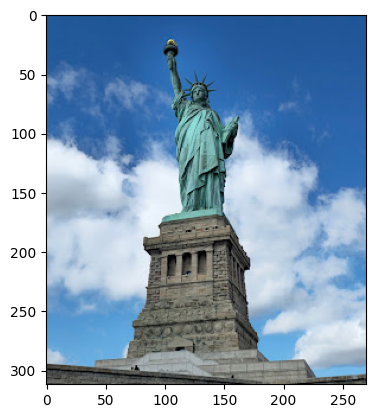

In [53]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
image=Image.open(file) # 파일열기
plt.imshow(image) # 이미지 출력하기

In [54]:
# 읽어온 이미지의 크기 살펴보기
image_N=np.array(image) # 이미지 파일을 넘파이 어레이로 변환
image_N.shape # 변환된 어레이의 크기, 모양 보기

(312, 270, 3)

In [55]:
# 맨 왼쪽 상단의 픽셀정보보기
C=image_N[0,0,:]
C

array([ 34,  89, 153], dtype=uint8)

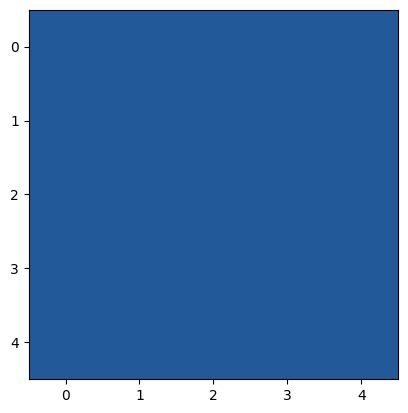

In [56]:
# 위 색깔 정보를 색으로 표현하기
D_img=np.zeros([5,5,3],dtype=np.uint8) # 가로 5, 세로 5 빈공간
D_img[:,:,:]=C # 모든 픽셀을 C 값으로
plt.imshow(D_img) # 이미지출력

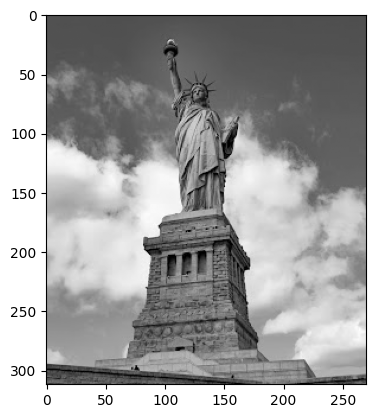

In [57]:
from PIL import Image
import numpy as np

gray_image = image.convert('L')  # 'L'은 8-bit grayscale
gray_array = np.array(gray_image)
plt.imshow(gray_array,cmap='gray')

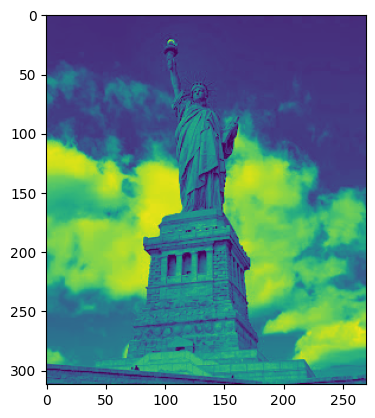

In [58]:
# getdata()는 픽셀정보를 가져온다.
# band=0는 RGB에서 R에 대한 정보를 가져온다.
imageM=np.array(image.getdata(band=0),int)
# 보통 이미지를 다루는 라이브러리는 픽셀을 열 기준으로 먼저 읽고
# 넘파이는 행 기준으로 먼저 읽기 때문에, 넘파이의 가로, 세로를 바꿔줘야 함
imageM.shape=(image.size[1],image.size[0])
plt.imshow(imageM)

In [62]:
imageM.shape

(312, 270)

In [63]:
from scipy.linalg import svd
u,s,vt=svd(imageM) # svd 수행
print(u.shape,s.shape,vt.shape)

(312, 312) (270,) (270, 270)


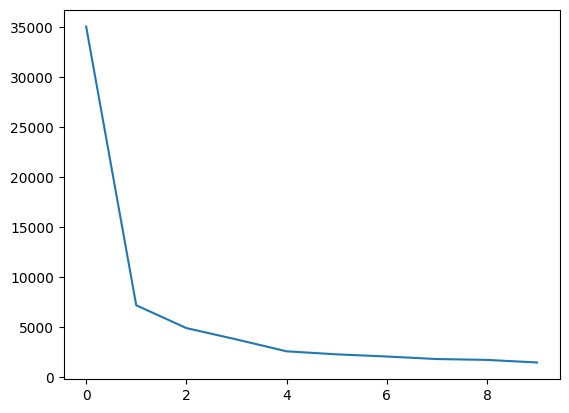

In [64]:
# 특이값 10개의 값 그리기
# svd를 수행하면 항상 특이값이 큰 순서부터 자동 정렬된다.
plt.plot(s[:10])

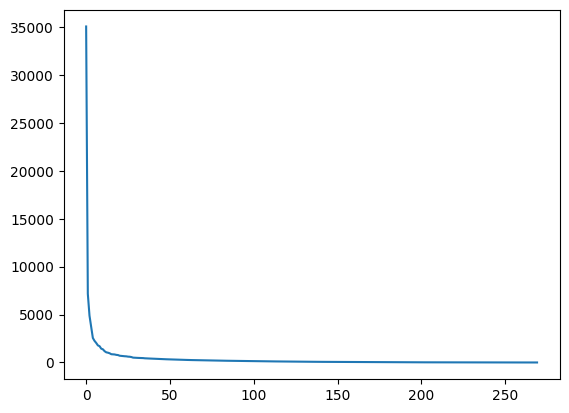

In [65]:
plt.plot(s)

In [66]:
u[:,0].reshape(-1,1).shape

(312, 1)

In [67]:
vt[0,:].reshape(1,-1).shape

(1, 270)

Text(0.5, 1.0, 'n=20')

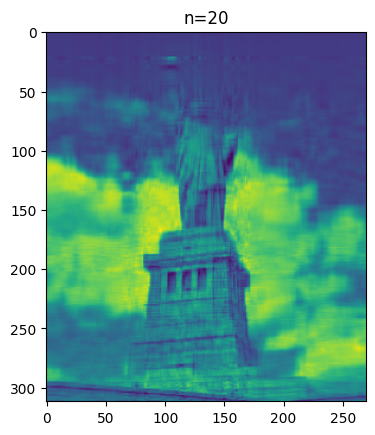

In [69]:
# 데이터의 일부를 발췌하여 이미지 다시 그려보기
n=20 # 불러올 특이값 개수 설정
IM=np.zeros([312,270])

# 원래 행렬에서 특이값이 큰 순서대로 n개에 해당하는 행렬로 축약
for i in range(n): # 첫번째 부터 n-1번째 특이값까지
    # u 행렬의 i번째 열, vt행렬의 i번째 행을 불러서 행렬 곱 수행
    # 이렇게 만든 행렬에 s[i]의 고유값을 곱해서 행렬 업데이트
    # 업데이트된 행렬을 기존 행렬(IM)에 계속 더해감
    IM+=s[i]*(u[:,i].reshape(-1,1)@vt[i,:].reshape(1,-1))
plt.imshow(IM)
plt.title(f'n={n}')

Text(0.5, 1.0, 'n=10')

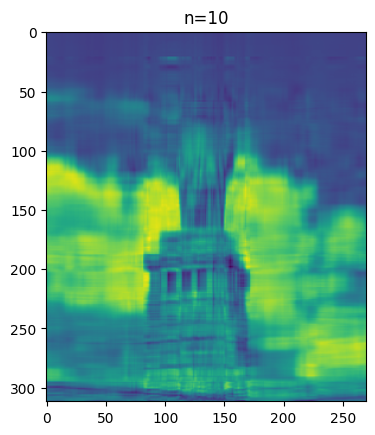

In [70]:
# 데이터의 일부를 발췌하여 이미지 다시 그려보기
n=10 # 불러올 특이값 개수 설정
IM=np.zeros([312,270])

# 원래 행렬에서 특이값이 큰 순서대로 n개에 해당하는 행렬로 축약
for i in range(n): # 첫번째 부터 n-1번째 특이값까지
    # u 행렬의 i번째 열, vt행렬의 i번째 행을 불러서 행렬 곱 수행
    # 이렇게 만든 행렬에 s[i]의 고유값을 곱해서 행렬 업데이트
    # 업데이트된 행렬을 기존 행렬(IM)에 계속 더해감
    IM+=s[i]*(u[:,i].reshape(-1,1)@vt[i,:].reshape(1,-1))
plt.imshow(IM)
plt.title(f'n={n}')

Text(0.5, 1.0, 'n=5')

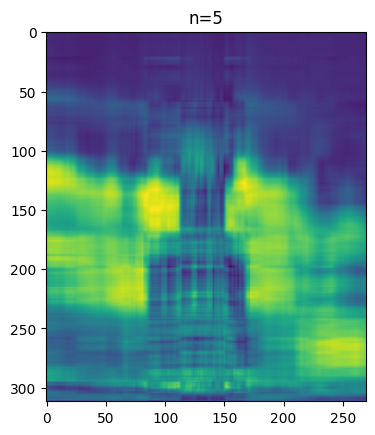

In [71]:
# 데이터의 일부를 발췌하여 이미지 다시 그려보기
n=5 # 불러올 특이값 개수 설정
IM=np.zeros([312,270])

# 원래 행렬에서 특이값이 큰 순서대로 n개에 해당하는 행렬로 축약
for i in range(n): # 첫번째 부터 n-1번째 특이값까지
    # u 행렬의 i번째 열, vt행렬의 i번째 행을 불러서 행렬 곱 수행
    # 이렇게 만든 행렬에 s[i]의 고유값을 곱해서 행렬 업데이트
    # 업데이트된 행렬을 기존 행렬(IM)에 계속 더해감
    IM+=s[i]*(u[:,i].reshape(-1,1)@vt[i,:].reshape(1,-1))
plt.imshow(IM)
plt.title(f'n={n}')

Text(0.5, 1.0, 'n=100')

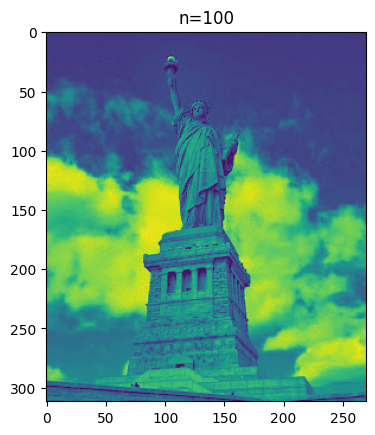

In [72]:
# 데이터의 일부를 발췌하여 이미지 다시 그려보기
n=100 # 불러올 특이값 개수 설정
IM=np.zeros([312,270])

# 원래 행렬에서 특이값이 큰 순서대로 n개에 해당하는 행렬로 축약
for i in range(n): # 첫번째 부터 n-1번째 특이값까지
    # u 행렬의 i번째 열, vt행렬의 i번째 행을 불러서 행렬 곱 수행
    # 이렇게 만든 행렬에 s[i]의 고유값을 곱해서 행렬 업데이트
    # 업데이트된 행렬을 기존 행렬(IM)에 계속 더해감
    IM+=s[i]*(u[:,i].reshape(-1,1)@vt[i,:].reshape(1,-1))
plt.imshow(IM)
plt.title(f'n={n}')

# 잠재의미분석

In [78]:
# 예제 문서
D = [
    "coke",
    "coke hamburger pizza",
    "hamburger",
    "라면",
    "짜장면 라면",
    "라면 떡뽂이"
]

In [79]:
# TfidfVectorizer는 단어, 문장을 숫자 행렬로 변환하는 기법중 하나
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화 객체 생성
vectorizer = TfidfVectorizer()

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(D)
X = X.toarray() # 밀집행렬로 변환
X.shape

(6, 6)

In [80]:
X

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.5355058 , 0.5355058 , 0.65304446, 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.56921261,
        0.82219037],
       [0.        , 0.        , 0.        , 0.82219037, 0.56921261,
        0.        ]])

In [85]:
# 단어 목록
vectorizer.get_feature_names_out()

array(['coke', 'hamburger', 'pizza', '떡뽂이', '라면', '짜장면'], dtype=object)

In [81]:
from scipy.linalg import svd
from sympy import Matrix
import numpy as np

u,s,vt=svd(X) # svd 수행

M1=np.zeros([6,6])

# 원래 행렬에서 특이값이 큰 순서대로 n개에 해당하는 행렬로 축약
for i in range(2): # 첫번째 부터 n-1번째 특이값까지
    M1+=s[i]*(u[:,i].reshape(-1,1)@vt[i,:].reshape(1,-1))

Matrix(M1)

Matrix([
[0.439329892049669, 0.43932989204967, 0.230886084363959,               0.0,               0.0,               0.0],
[ 0.62130629169255, 0.62130629169255, 0.326522231870729,               0.0,               0.0,               0.0],
[0.439329892049669, 0.43932989204967, 0.230886084363959,               0.0,               0.0,               0.0],
[              0.0,              0.0,               0.0, 0.284974678729433, 0.795937265254165, 0.284974678729433],
[              0.0,              0.0,               0.0, 0.246100387899816, 0.687360963424213, 0.246100387899816],
[              0.0,              0.0,               0.0, 0.246100387899816, 0.687360963424213, 0.246100387899816]])

In [87]:
from sklearn.decomposition import TruncatedSVD

# LSA 수행
num_topics = 2
lsa_model = TruncatedSVD(n_components=num_topics)
lsa_topic_matrix = lsa_model.fit_transform(X)

# 단어 목록
terms = vectorizer.get_feature_names_out()

In [88]:
lsa_topic_matrix.shape

(6, 2)

In [89]:
terms

array(['coke', 'hamburger', 'pizza', '떡뽂이', '라면', '짜장면'], dtype=object)

In [91]:
# terms: vectorizer.get_feature_names_out() 로 얻은 단어 리스트
# lsa_model.components_ 에는 각 단어들에 대한 Vt.T 행 정보가 들어감
import pandas as pd
df_components = pd.DataFrame(lsa_model.components_, columns=terms)
df_components

,coke,hamburger,pizza,떡뽂이,라면,짜장면
0,6.811539e-15,7.454361e-15,3.816359e-15,3.194235e-01,8.921532e-01,3.194235e-01
1,6.628197e-01,6.628197e-01,3.483392e-01,-3.506373e-15,-9.634254e-15,-3.349341e-15


In [94]:
topic=lsa_model.components_[0]  # 0번째 주제
topic

array([6.81153876e-15, 7.45436061e-15, 3.81635940e-15, 3.19423492e-01,
       8.92153162e-01, 3.19423492e-01])

In [96]:
# topic 벡터에서 가장 값이 큰 3개 요소의 인덱스를 추출
# sorting 기본적으로 오름차순으로 마지막 3개를 고르게 됨
topic.argsort()[-3:]

array([3, 5, 4])

In [98]:
# 정렬 순서를 바꿈 (가장 큰 순서대로)
topic.argsort()[-3:] [::-1]

array([4, 5, 3])

In [93]:
# 주제와 관련된 주요 단어 출력
for i, topic in enumerate(lsa_model.components_):
    top_keywords_idx = topic.argsort()[-3:][::-1]  # 주요 단어 3개 추출
    top_keywords = [terms[idx] for idx in top_keywords_idx]
    print(f"Topic {i + 1}: {', '.join(top_keywords)}")

# 문서별 주제 할당
document_topics = lsa_model.transform(X)
print("\nDocument-Topic Matrix:")
print(document_topics)

Topic 1: 라면, 짜장면, 떡뽂이
Topic 2: hamburger, coke, pizza

Document-Topic Matrix:
[[ 6.81153876e-15  6.62819653e-01]
 [ 1.01317243e-14  9.37368542e-01]
 [ 7.45436061e-15  6.62819653e-01]
 [ 8.92153162e-01 -9.63425357e-15]
 [ 7.70451748e-01 -8.23773432e-15]
 [ 7.70451748e-01 -8.36684470e-15]]
